<center>
<img src="FIFA-19-Background-1-768x401.jpg" />

## Aprendizaje No Supervisado 2020 DiploDatos
    Gil Francisco, Pacharoni Julieta, Lois Manuela, Palacio Karen
## Exploración visual y Agrupamiento con el FIFA 2020 dataset
    
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros.

### Indice de temas
1. [Inicialización del entorno](#1.-Inicialización-del-entorno)
2. [Exploración de la Base](#2.-Exploración-de-la-base)
3. [Preparación de los datos](#3.-Preparación-de-los-datos)
4. [Clustering Visual](#4.-Exploratorio-Visual-para-Clustering)
5. [Clustering con K means](#5.-Clustering-con-K-Means)
6. [Análisis de Silhouette](#6.-Análisis-Silhouette)
7. [Clustering con Mean Shift](#7.Clustering-Mean-Shift)
8. [Qué hubieramos encontrado con 4 y 6 grupos en K-means?](#8.Que-hubieramos-encontrado)
9. [Hierarchical analysis: Dendograma](#9.Dendograma)

## 1.-Inicialización-del-entorno

**Empezamos cargando algunas herramientas para cargar los datos y manipularlos.**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

**Para visualización usaremos principalmente plotly, también seaborn y matplotlib.**

In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

## 2.-Exploración-de-la-base

**Cargamos los datos bajados de la database del FIFA 2020**

In [3]:
df=pd.read_csv("./practico/players_20.csv")
df.head(4)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         NaN          NaN   
3        NaN     NaN       87.0         92.0        78.0         89.0   

   gk_speed  gk_positioning  \
0       NaN             NaN   
1       NaN             NaN   
2       NaN             NaN   
3      52.0            90.0   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...                  88   
1  Long Throw-in, Selfish, Argues with Officials,...                  84   
2  Power Free-Kick, Injury Free, Selfish, Early C...                  87   
3                         Flair, Acrobatic Clearance                

In [4]:
print(df.columns)
print(len(df.columns))

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)
104


La variable **'Overall'** se calcula usando otras variables de desempeño del jugador (skills_ratings).

La variable 'Overall' es discreta, así como las otras de desempeño según habilidad ('Crossing',
       'Finishing', 'HeadingAccuracy', etc.), tomando valores enteros entre 0 y 100
       
Miramos ahora los mejores jugadores por posicion, usando las variables 'Overall' y 'Position'. 

**Realizamos el histograma de la variable "Overall" (Desempeño global)**

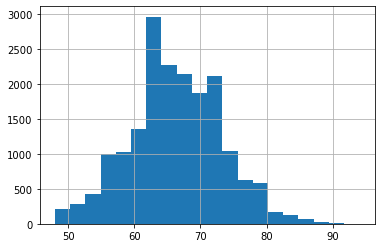

In [5]:
df['overall'].hist(bins = 20)

In [6]:
best_players_per_position=df.iloc[df.groupby(df['team_position'])['overall'].idxmax()][['team_position','short_name','overall']]
best_players_per_position

team_position           short_name  overall
2             CAM            Neymar Jr       92
126            CB           S. de Vrij       84
21            CDM      Sergio Busquets       89
46             CF           K. Benzema       87
123            CM         Luis Alberto       84
3              GK             J. Oblak       91
306           LAM               Taison       82
51             LB           Jordi Alba       87
7             LCB          V. van Dijk       90
33            LCM          David Silva       88
24            LDM             P. Pogba       88
259            LF          K. Demirbay       82
38             LM        P. Aubameyang       88
54             LS           L. Insigne       87
1              LW    Cristiano Ronaldo       93
483           LWB       M. Halstenberg       80
95            RAM            H. Ziyech       85
61             RB           J. Kimmich       86
29            RCB                Piqué       88
5             RCM         K. De Bruyne       91
78            RDM  S. Milinković-Savić       85
93            RES            M. Icardi       85
109            RF           K. Havertz       84
27             RM           C. Eriksen       88
104            RS           Iago Aspas       85
0              RW             L. Messi       94
476           RWB         P. Kadeřábek       80
12             ST              H. Kane       89
48            SUB           D. Mertens       87

In [7]:
pd.DataFrame(df.team_position.value_counts().sort_index())

team_position
CAM            311
CB             100
CDM            181
CF              14
CM              76
GK             662
LAM             23
LB             560
LCB            660
LCM            411
LDM            242
LF              19
LM             398
LS             195
LW             162
LWB             58
RAM             23
RB             560
RCB            660
RCM            411
RDM            244
RES           2958
RF              19
RM             399
RS             195
RW             161
RWB             58
ST             458
SUB           7820

In [8]:
club_avg_overall=df.groupby("club")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(8)

club    overall
226  FC Bayern München  81.304348
505        Real Madrid  80.121212
350           Juventus  80.060606
650            Uruguay  78.608696
224       FC Barcelona  78.363636
407             Mexico  78.000000
426        Netherlands  78.000000
166           Colombia  78.000000

## 3.-Preparación-de-los-datos

**Retiramos jugadores con bajo Desempeño global ("Overall"), reducimos el tamaño de la base**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [9]:
n=10000 #cantidad de jugadores a considerar

df_n=df.loc[:n] #se reduce la base a los n primeros jugadores

df_n=df_n[(df_n['overall']>70)]

skills_ratings = ["pace", "shooting", "passing", "dribbling", "defending", "physic", 
                  #"gk_diving", "gk_handling", "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning", 
                  "attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", 
                  "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy", "skill_long_passing", 
                  "skill_ball_control", "movement_acceleration", "movement_sprint_speed", "movement_agility", 
                  "movement_reactions", "movement_balance", "power_shot_power",
                 "power_jumping", "power_stamina", "power_strength", "power_long_shots", "mentality_aggression",
                 "mentality_interceptions", "mentality_positioning", "mentality_vision", "mentality_penalties", 
                 "mentality_composure", "defending_marking", "defending_standing_tackle", "defending_sliding_tackle"]
                 #"goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning",
                 # "goalkeeping_reflexes"]
#print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

***Decidimos quitar los arqueros del dataset para poder encontrar clusters mas interesantes de jugadores, ya que es muy obvia la diferenciación entre arqueros y jugadores.***

Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización

In [10]:
MachineGunDict={'short_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
    
df_n=df_n.append(MachineGunDict,ignore_index=True)

sin_arqueros = df_n[df_n["player_positions"]!= "GK"]

In [11]:
df_skills=sin_arqueros[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [12]:
df_skills.head(10)

pace  shooting  passing  dribbling  defending  physic  attacking_crossing  \
0   87.0      92.0     92.0       96.0       39.0    66.0                  88   
1   90.0      93.0     82.0       89.0       35.0    78.0                  84   
2   91.0      85.0     87.0       95.0       32.0    58.0                  87   
4   91.0      83.0     86.0       94.0       35.0    66.0                  81   
5   76.0      86.0     92.0       86.0       61.0    78.0                  93   
7   77.0      60.0     70.0       71.0       90.0    86.0                  53   
8   74.0      76.0     89.0       89.0       72.0    66.0                  86   
9   93.0      86.0     81.0       89.0       45.0    74.0                  79   
10  96.0      84.0     78.0       90.0       39.0    75.0                  78   
11  71.0      28.0     54.0       67.0       89.0    87.0                  30   

    attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                    95                          70                       92   
1                    94                          89                       83   
2                    87                          62                       87   
4                    84                          61                       89   
5                    82                          55                       92   
7                    52                          86                       78   
8                    72                          55                       92   
9                    90                          59                       84   
10                   89                          77                       82   
11                   22                          83                       71   

    attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                  88               97           93                 94   
1                  87               89           81                 76   
2                  87               96           88                 87   
4                  83               95           83                 79   
5                  82               86           85                 83   
7                  45               70           60                 70   
8                  76               87           85                 78   
9                  79               89           83                 69   
10                 79               91           79                 63   
11                 14               69           28                 28   

    skill_long_passing  skill_ball_control  movement_acceleration  \
0                   92                  96                     91   
1                   77                  92                     89   
2                   81                  95                     94   
4                   83                  94                     94   
5                   91                  91                     77   
7                   81                  76                     74   
8                   88                  92                     77   
9                   75                  89                     94   
10                  70                  90                     96   
11                  63                  71                     69   

    movement_sprint_speed  movement_agility  movement_reactions  \
0                      84                93                  95   
1                      91                87                  96   
2                      89                96                  92   
4                      88                95                  90   
5                      76                78                  91   
7                      79                61                  88   
8                      71                92                  89   
9                      92                91                  92   
10                     96                92          

## 4.-Exploratorio-Visual-para-Clustering

Graficamos diferenciando los mejores jugadores y alguna característica de interés (Elegir)

Se puede ubicar un jugador con la siguiente linea de comando, por ejemplo, Leo Messi: 

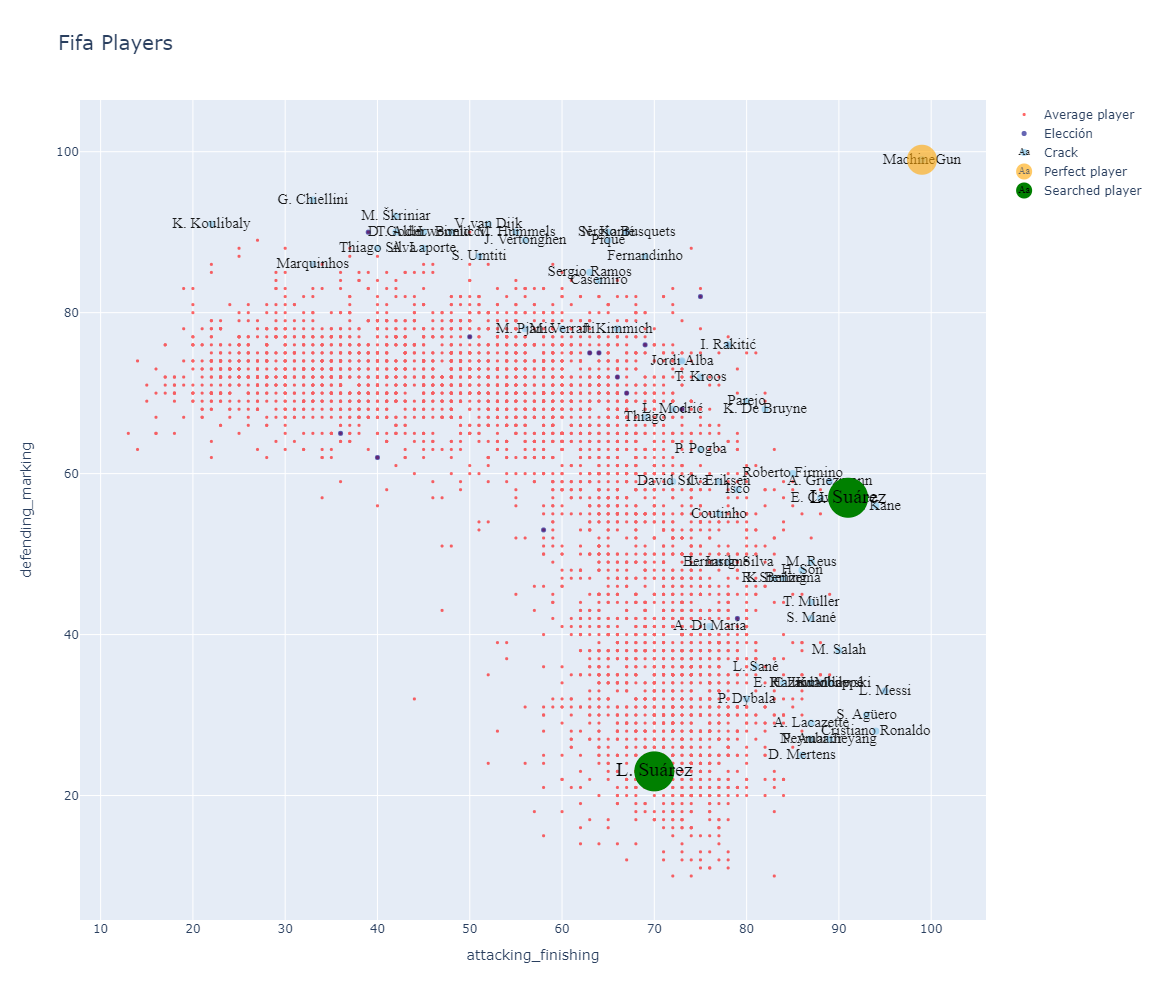

In [13]:
df_n = sin_arqueros
df_skills=df_n[skills_ratings]

#Elegimos un jugador
recherche_joueur=df_n["short_name"]=='L. Suárez' 
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro 


bool_crack=df_n["overall"] > 85
bool_elecc=df_n["club"]=='FC Barcelona' 
#bool_elecc=df_n["Position"]=='GK' #arqueros
bool_no_crack=df_n["overall"]<86
bool_machinegun=df_n["short_name"]=='MachineGun'

skill_1 = "attacking_finishing"
skill_2 = "defending_marking"

palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average player',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')
n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'short_name'],
                         opacity=0.6,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

***En el gráfico anterior, hemos seleccionado las variables adecuadas para poder distinguir Defensores de Atacantes. Ya que, como vemos, en la parte superior
izquierda encontramos jugadores que tienen buena marca, es decir que quitan el balón; y a la derecha abajo tenemos jugadores que tienen buena definición
a la hora de marcar el gol. Algunos de ellos, son mediocampistas ofensivos, como A. Di María o L. Messi; y otros son centrodelanteros natos, como L. Suárez.***

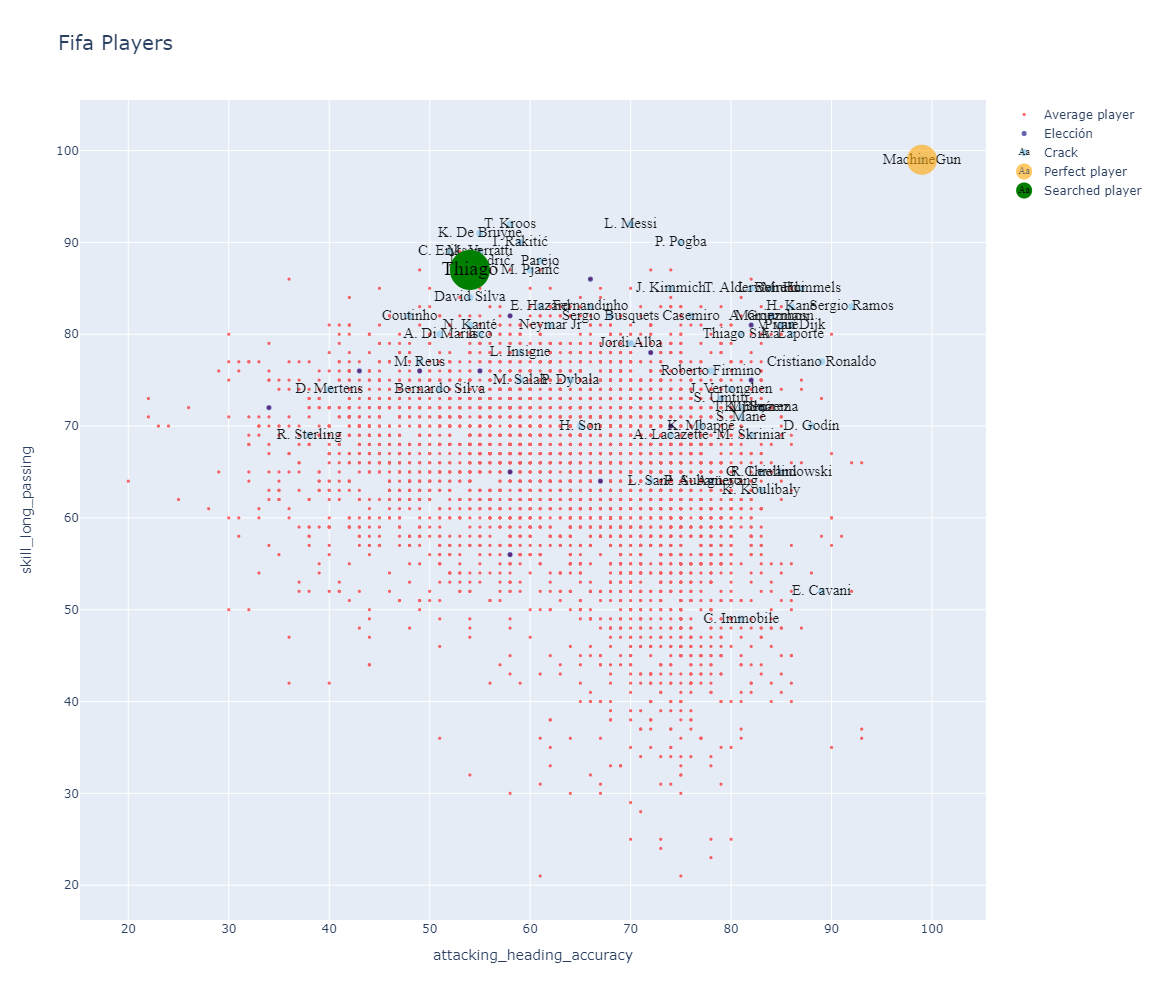

In [14]:
df_n = sin_arqueros
df_skills=df_n[skills_ratings]

#Elegimos un jugador
recherche_joueur=df_n["short_name"]=='Thiago' 
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro 


bool_crack=df_n["overall"] > 85
bool_elecc=df_n["club"]=='FC Barcelona' 
#bool_elecc=df_n["Position"]=='GK' #arqueros
bool_no_crack=df_n["overall"]<86
bool_machinegun=df_n["short_name"]=='MachineGun'

skill_1 = "attacking_heading_accuracy"
skill_2 = "skill_long_passing"

palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average player',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')
n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'short_name'],
                         opacity=0.6,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

***Dentro del grupo Atacantes, podemos diferenciar los Delanteros natos (mencionados arriba) de los Mediocampistas ofensivos, eligiendo las variables de arriba.
A la derecha y al medio/abajo podemos encontrar los delanteros puros, que se diferencian por cabecear bien dentro del área. Y los mediocampistas ofensivos se
diferencian por no ser tan buenos cabeceadores, pero sin embargo dan buenos pases para asistir a los delanteros. A la derecha y arriba, se infiltran
Defensores que se caracterizan por ser buenos cabeceadores y dar buenos pases largos.***

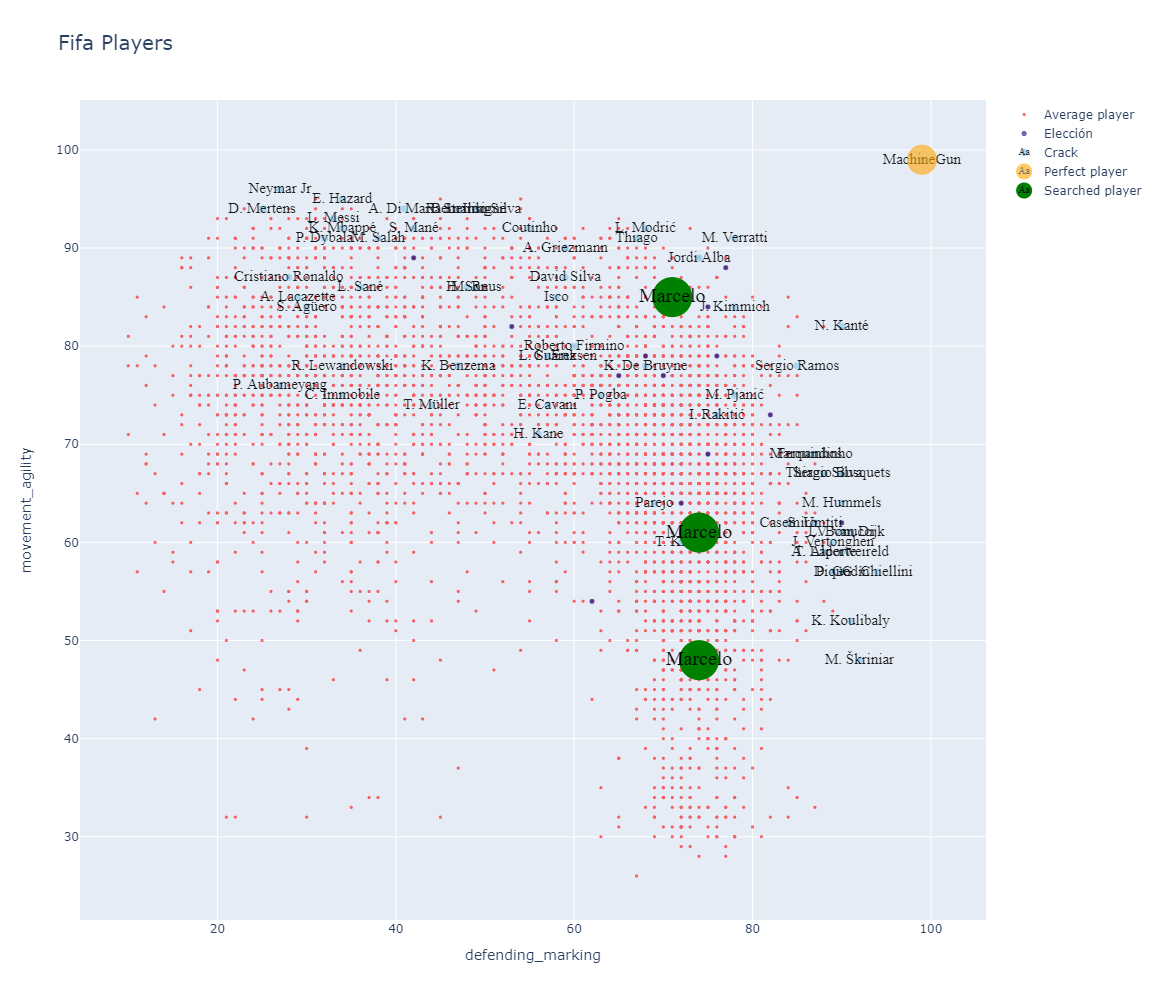

In [15]:
df_n = sin_arqueros
df_skills=df_n[skills_ratings]

#Elegimos un jugador
recherche_joueur=df_n["short_name"]=='Marcelo' 
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro 


bool_crack=df_n["overall"] > 85
bool_elecc=df_n["club"]=='FC Barcelona' 
#bool_elecc=df_n["Position"]=='GK' #arqueros
bool_no_crack=df_n["overall"]<86
bool_machinegun=df_n["short_name"]=='MachineGun'

skill_1 = "defending_marking"
skill_2 = "movement_agility"

palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average player',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')
n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'short_name'],
                         opacity=0.6,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

***En este gráfico, podemos diferenciar los Defensas puros (ubicados en la zona derecha y baja) de los Defensas que pasan al ataque. Estos últimos, se caracterizan por tener buena marca, pero además ser ágiles y contribuir al ataque del equipo, y se ubican arriba a la derecha. Arriba y a la izquierda, se ubican los centrocampistas ofensivos que son ágiles, y que no marcan bien.***

# 5.-Clustering-con-K-Means

In [16]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust, random_state=0)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
df_n["clusters"] = clusters

In [17]:
show = pd.DataFrame({'name': df_n["short_name"], 'cluster': df_n["clusters"]})
# Cuidado, quizas haya que modificar este mapeo por cada vez que se ejecute el algoritmo
cluster_map = {
    0:"defensor habilidoso",
    1: "MC ofensivo",
    2: "defensor nato",
    3: "delantero nato",
    4: "Mediocampo"
}

In [18]:
cluster_clean = []
for i in clusters:
    cluster_clean.append(cluster_map[i])

In [19]:
show["cluster_clean"]=cluster_clean

In [20]:
show.head(50)

name  cluster        cluster_clean
0            L. Messi        1          MC ofensivo
1   Cristiano Ronaldo        1          MC ofensivo
2           Neymar Jr        1          MC ofensivo
4           E. Hazard        1          MC ofensivo
5        K. De Bruyne        4           Mediocampo
7         V. van Dijk        0  defensor habilidoso
8           L. Modrić        4           Mediocampo
9            M. Salah        1          MC ofensivo
10          K. Mbappé        1          MC ofensivo
11       K. Koulibaly        2        defensor nato
12            H. Kane        3       delantero nato
15           N. Kanté        4           Mediocampo
16       G. Chiellini        2        defensor nato
17          S. Agüero        1          MC ofensivo
18       Sergio Ramos        4           Mediocampo
19          L. Suárez        1          MC ofensivo
20     R. Lewandowski        3       delantero nato
21    Sergio Busquets        4           Mediocampo
22       A. Griezmann        4           Mediocampo
23          P. Dybala        1          MC ofensivo
24           P. Pogba        4           Mediocampo
26        R. Sterling        1          MC ofensivo
27         C. Eriksen        1          MC ofensivo
29              Piqué        0  defensor habilidoso
33        David Silva        1          MC ofensivo
34          E. Cavani        3       delantero nato
35           D. Godín        2        defensor nato
36           T. Kroos        4           Mediocampo
37            M. Reus        1          MC ofensivo
38      P. Aubameyang        1          MC ofensivo
39            S. Mané        1          MC ofensivo
40         A. Laporte        0  defensor habilidoso
41     Bernardo Silva        1          MC ofensivo
42           Casemiro        4           Mediocampo
43             H. Son        1          MC ofensivo
44        Fernandinho        4           Mediocampo
45       Thiago Silva        0  defensor habilidoso
46         K. Benzema        1          MC ofensivo
47      J. Vertonghen        4           Mediocampo
48         D. Mertens        1          MC ofensivo
49         M. Hummels        0  defensor habilidoso
50    T. Alderweireld        0  defensor habilidoso
51         Jordi Alba        4           Mediocampo
52             Thiago        4           Mediocampo
54         L. Insigne        1          MC ofensivo
55            L. Sané        1          MC ofensivo
56         Marquinhos        0  defensor habilidoso
57        M. Škriniar        2        defensor nato
58        M. Verratti        4           Mediocampo
59          S. Umtiti        0  defensor habilidoso

In [21]:
promedios = df_n.groupby(["clusters"]).mean()
for i in range(5):
    print("Mejores caracteristicas de: ", cluster_map[i]);
    print(promedios[skills_ratings].iloc[i].sort_values(ascending=False))

Mejores caracteristicas de:  defensor habilidoso
power_stamina                 77.608123
mentality_aggression          74.420417
defending_standing_tackle     74.251372
physic                        73.761800
mentality_interceptions       72.972558
defending_sliding_tackle      72.612514
power_jumping                 72.499451
defending                     72.229418
attacking_short_passing       71.889133
defending_marking             71.780461
power_strength                71.689352
movement_reactions            71.624588
movement_sprint_speed         71.130626
skill_ball_control            70.949506
pace                          70.835346
movement_acceleration         70.454446
mentality_composure           69.497256
movement_agility              69.105379
dribbling                     68.922064
movement_balance              67.666301
skill_dribbling               67.462130
skill_long_passing            67.151482
passing                       65.838639
attacking_heading_accuracy    6

***Arriba podemos ver las principales características de cada uno de los clusters encontrados por K-means, y en base a ello (y teniendo un poco de conocimiento
de dominio) los hemos etiquetado.
Al elegir 5 clusters, quizás encontramos sub-clusters, como por ejemplo el de "Defensores habilidosos". Quizás, si el parámetro k del algoritmo hubiese sido
4, hubiera agrupado a todos los defensores en el mismo grupo.***
1. Defensor habilidoso: tiene buena marca y defiende bien, pero además tiene cualidades ofensivas ya que presenta puntuaciones elevadas en aceleración y 
velocidad, y tiene buen manejo del balón; por lo que frecuentemente pasarán al ataque.
2. Defensor nato: tiene buena marca, presenta buenas cualidades físicas para defender, son robustos; pero no tienen buen manejo del balón. Por lo tanto 
sirven para jugar como centrales, por ejemplo.
3. Mediocampistas: tienen buen manejo del balón, dan buenos pases y tienen visión de juego. Excelentes para jugar al mediocampo y armar juego.
4. Mediocampistas ofensivos: son veloces, tienen buen manejo del balón y agilidad. Ideales para romper la defensa y generar ocasiones de gol.
5. Delanteros natos: goleadores. Ideales para definir la jugada, cabecean bien, presentan buen porte físico para afrontar a los defensores (que también
son robustos). No son tan ágiles con el balón.

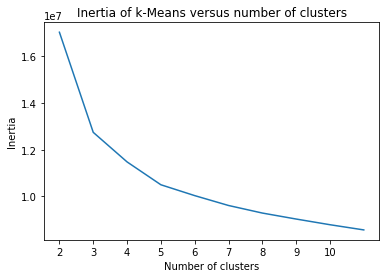

In [22]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(df_skills).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.xticks(np.arange(2, 11, step=1)) 
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
plt.show()

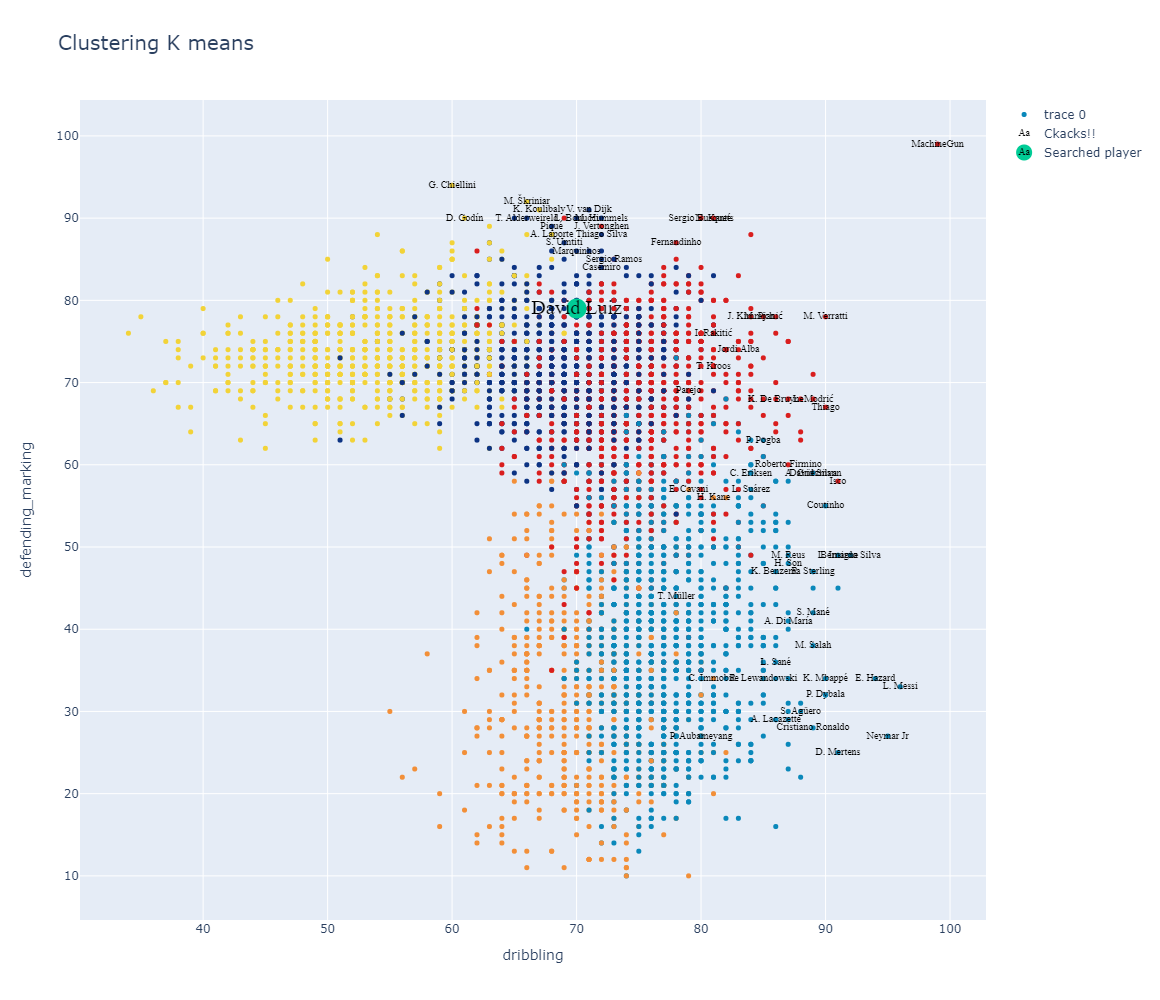

In [23]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1 = "dribbling"
skill_2 = "defending_marking"

recherche_joueur=df_n["short_name"]=='David Luiz' 

kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=1,mode='text')

joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(size=20),mode='markers+text')

data=[kmean_clusters,crack,joueur_recherche]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

# 6.-Análisis-Silhouette

For n_clusters = 2 The average silhouette_score is : 0.32663177168452323
For n_clusters = 3 The average silhouette_score is : 0.2967652273530319
For n_clusters = 4 The average silhouette_score is : 0.24702435340236867
For n_clusters = 5 The average silhouette_score is : 0.18846444804282592
For n_clusters = 6 The average silhouette_score is : 0.180287059742349
For n_clusters = 7 The average silhouette_score is : 0.15788396588256107
For n_clusters = 8 The average silhouette_score is : 0.13512308343227483
For n_clusters = 9 The average silhouette_score is : 0.12537689813123035


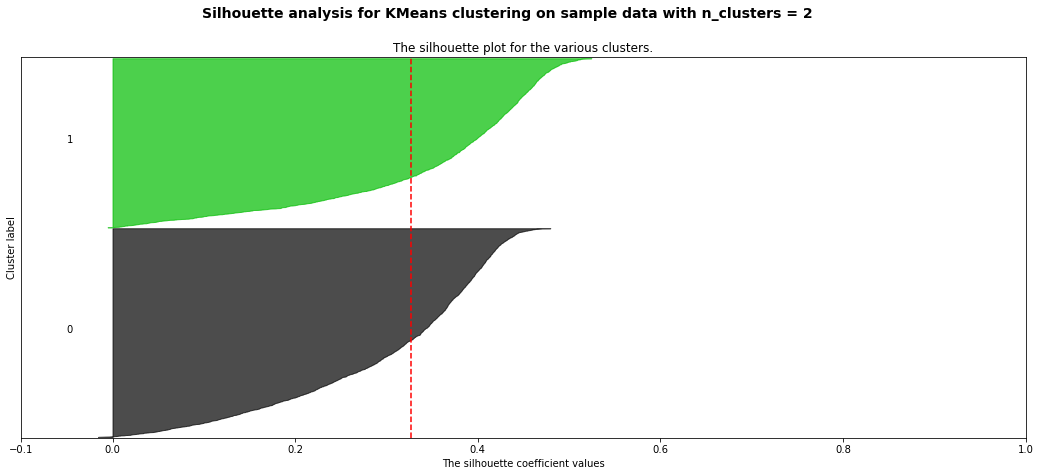

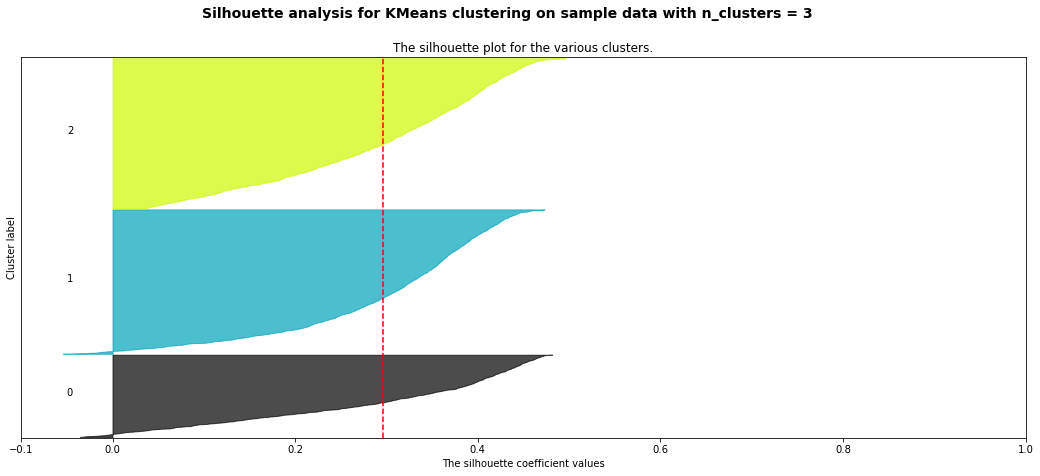

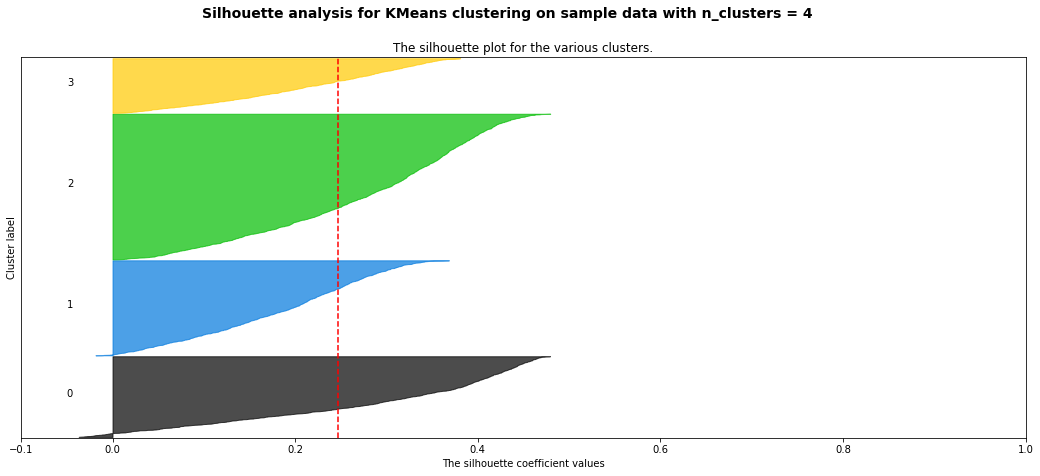

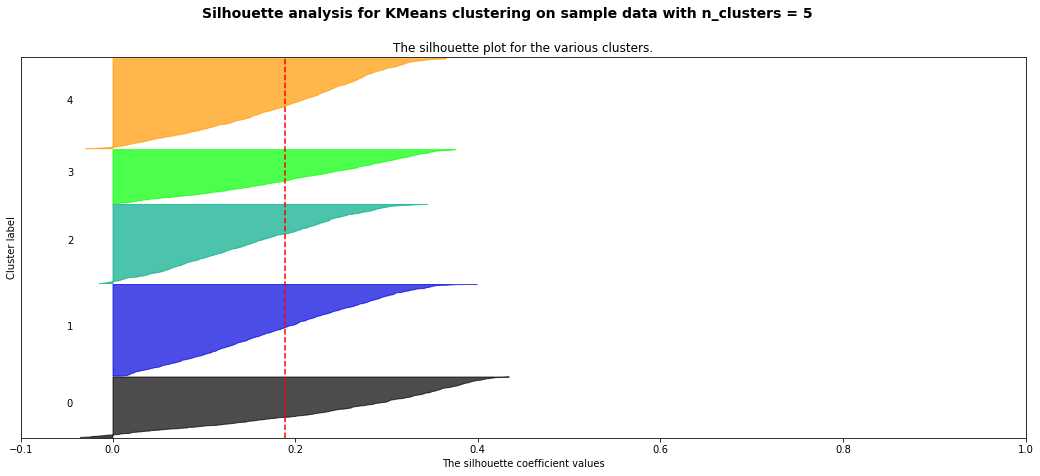

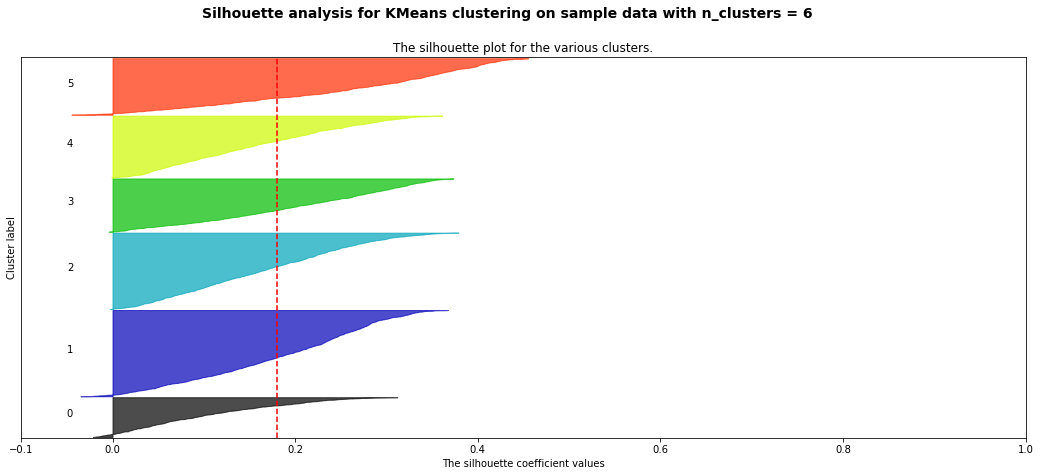

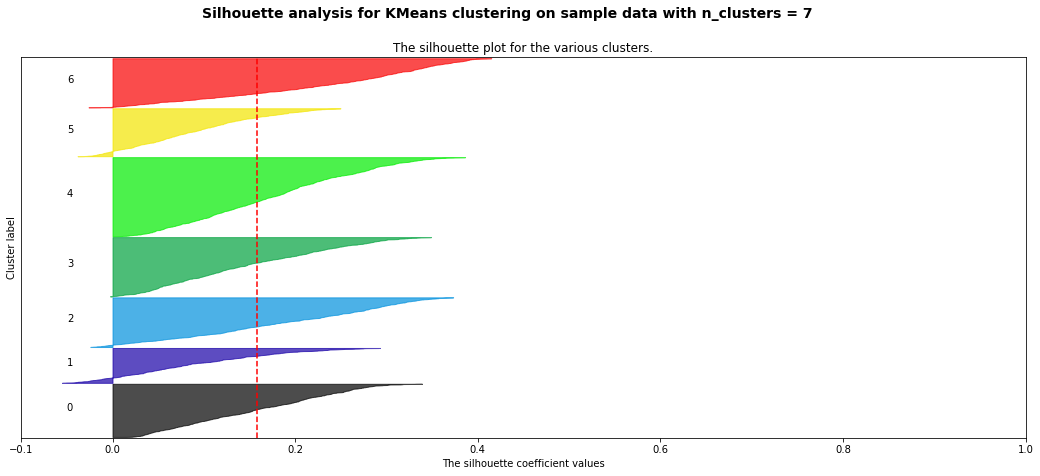

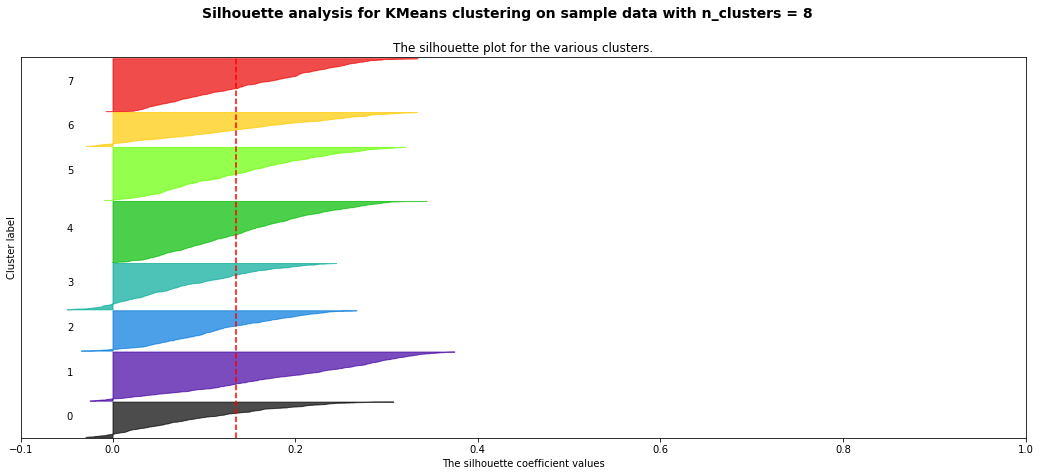

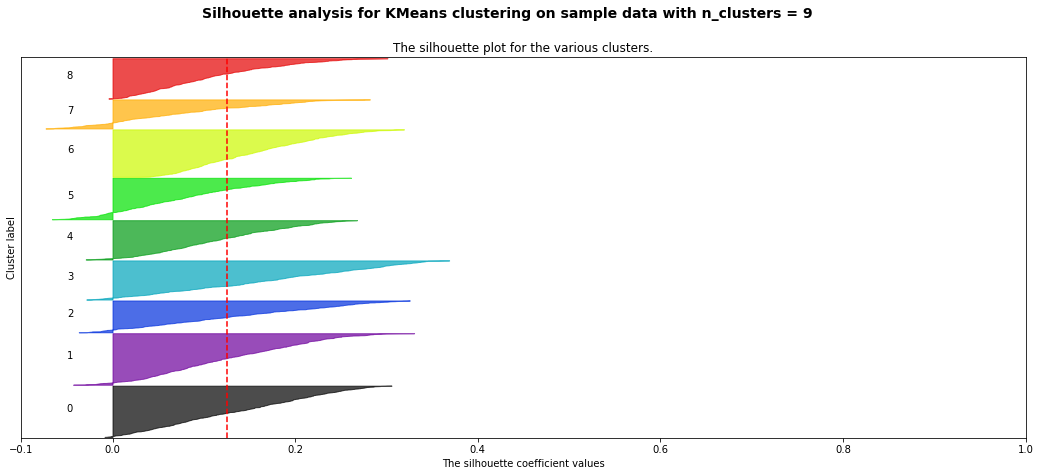

In [24]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X = df_skills

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

***Observando los gráficos de Silhouette, vemos que está bastante acertada la elección de k = 5. Ya que, todos los grupos presentan aproximadamente la misma
cantidad de jugadores. Al pasar a k = 6, vemos que queda un grupo con poca cantidad, el de color negro.
Y, al elegir k = 4, queda un grupo desequilibrado con mucha cantidad de jugadores, que es el verde.***

# 7.Clustering-Mean-Shift

In [25]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

ms = MeanShift(bandwidth=70, bin_seeding=True)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

# Etquetas de los elementos de los clusters


Numero estimado de clusters para Mean Shift : 2


In [26]:
show["mean_shift"] = clusters2

In [27]:
cluster_map = {
    0:"Defensa",
    1: "Ataque"
}
cluster_clean = []
for i in clusters2:
    cluster_clean.append(cluster_map[i])
show["meanShift_clean"]=cluster_clean

In [28]:
show.head(50)

name  cluster        cluster_clean  mean_shift  \
0            L. Messi        1          MC ofensivo           1   
1   Cristiano Ronaldo        1          MC ofensivo           1   
2           Neymar Jr        1          MC ofensivo           1   
4           E. Hazard        1          MC ofensivo           1   
5        K. De Bruyne        4           Mediocampo           1   
7         V. van Dijk        0  defensor habilidoso           0   
8           L. Modrić        4           Mediocampo           0   
9            M. Salah        1          MC ofensivo           1   
10          K. Mbappé        1          MC ofensivo           1   
11       K. Koulibaly        2        defensor nato           0   
12            H. Kane        3       delantero nato           1   
15           N. Kanté        4           Mediocampo           0   
16       G. Chiellini        2        defensor nato           0   
17          S. Agüero        1          MC ofensivo           1   
18       Sergio Ramos        4           Mediocampo           0   
19          L. Suárez        1          MC ofensivo           1   
20     R. Lewandowski        3       delantero nato           1   
21    Sergio Busquets        4           Mediocampo           0   
22       A. Griezmann        4           Mediocampo           1   
23          P. Dybala        1          MC ofensivo           1   
24           P. Pogba        4           Mediocampo           0   
26        R. Sterling        1          MC ofensivo           1   
27         C. Eriksen        1          MC ofensivo           1   
29              Piqué        0  defensor habilidoso           0   
33        David Silva        1          MC ofensivo           1   
34          E. Cavani        3       delantero nato           1   
35           D. Godín        2        defensor nato           0   
36           T. Kroos        4           Mediocampo           0   
37            M. Reus        1          MC ofensivo           1   
38      P. Aubameyang        1          MC ofensivo           1   
39            S. Mané        1          MC ofensivo           1   
40         A. Laporte        0  defensor habilidoso           0   
41     Bernardo Silva        1          MC ofensivo           1   
42           Casemiro        4           Mediocampo           0   
43             H. Son        1          MC ofensivo           1   
44        Fernandinho        4           Mediocampo           0   
45       Thiago Silva        0  defensor habilidoso           0   
46         K. Benzema        1          MC ofensivo           1   
47      J. Vertonghen        4           Mediocampo           0   
48         D. Mertens        1          MC ofensivo           1   
49         M. Hummels        0  defensor habilidoso           0   
50    T. Alderweireld        0  defensor habilidoso           0   
51         Jordi Alba        4           Mediocampo           0   
52             Thiago        4           Mediocampo           0   
54         L. Insigne        1          MC ofensivo           1   
55            L. Sané        1          MC ofensivo           1   
56         Marquinhos        0  defensor habilidoso           0   
57        M. Škriniar        2        defensor nato           0   
58        M. Verratti        4           Mediocampo           0   
59          S. Umtiti        0  defensor habilidoso           0   

   meanShift_clean  
0           Ataque  
1           Ataque  
2           Ataque  
4           Ataque  
5           Ataque  
7          Defensa  
8          Defensa  
9           Ataque  
10          Ataque  
11         Defensa  
12          Ataque  
15         Defensa  
16         Defensa  
17          Ataque  
18         Defensa  
19          Ataque  
20          Ataque  
21         Defensa  
22          Ataque  
23          Ataque  
24         Defensa  
26          Ataque  
27          Ataque  
29         Defensa  
33          Ataque  
34          Ataque  
35         Defensa  
36         

***Después de probar diferentes valores de bandwidth, encontramos el clustering de arriba que tiene sentido. El algoritmo nos da 2 grupos, uno compuesto por jugadores con un perfil de Ataque, y el otro compuesto por jugadores con un perfil defensivo. Nos da una mirada más general, mientras que K-means pudo profundizar un poco más en las características de los jugadores.***

# 8.Que-hubieramos-encontrado

In [29]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust, random_state=0)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
df_n["clusters"] = clusters

show2 = pd.DataFrame({'name': df_n["short_name"], 'cluster': df_n["clusters"]})
# Cuidado, quizas haya que modificar este mapeo por cada vez que se ejecute el algoritmo
cluster_map = {
    0: "Defensa",
    1: "MC ofensivo",
    2: "Mediocampo",
    3: "Delantero"
}
cluster_clean = []
for i in clusters:
    cluster_clean.append(cluster_map[i])

show2["cluster_clean"] = cluster_clean

In [30]:
show2.head(50)

name  cluster cluster_clean
0            L. Messi        2    Mediocampo
1   Cristiano Ronaldo        2    Mediocampo
2           Neymar Jr        2    Mediocampo
4           E. Hazard        2    Mediocampo
5        K. De Bruyne        2    Mediocampo
7         V. van Dijk        0       Defensa
8           L. Modrić        0       Defensa
9            M. Salah        2    Mediocampo
10          K. Mbappé        2    Mediocampo
11       K. Koulibaly        1   MC ofensivo
12            H. Kane        3     Delantero
15           N. Kanté        0       Defensa
16       G. Chiellini        1   MC ofensivo
17          S. Agüero        2    Mediocampo
18       Sergio Ramos        0       Defensa
19          L. Suárez        2    Mediocampo
20     R. Lewandowski        3     Delantero
21    Sergio Busquets        0       Defensa
22       A. Griezmann        2    Mediocampo
23          P. Dybala        2    Mediocampo
24           P. Pogba        0       Defensa
26        R. Sterling        2    Mediocampo
27         C. Eriksen        2    Mediocampo
29              Piqué        0       Defensa
33        David Silva        2    Mediocampo
34          E. Cavani        3     Delantero
35           D. Godín        1   MC ofensivo
36           T. Kroos        0       Defensa
37            M. Reus        2    Mediocampo
38      P. Aubameyang        2    Mediocampo
39            S. Mané        2    Mediocampo
40         A. Laporte        0       Defensa
41     Bernardo Silva        2    Mediocampo
42           Casemiro        0       Defensa
43             H. Son        2    Mediocampo
44        Fernandinho        0       Defensa
45       Thiago Silva        0       Defensa
46         K. Benzema        2    Mediocampo
47      J. Vertonghen        0       Defensa
48         D. Mertens        2    Mediocampo
49         M. Hummels        0       Defensa
50    T. Alderweireld        0       Defensa
51         Jordi Alba        0       Defensa
52             Thiago        0       Defensa
54         L. Insigne        2    Mediocampo
55            L. Sané        2    Mediocampo
56         Marquinhos        1   MC ofensivo
57        M. Škriniar        1   MC ofensivo
58        M. Verratti        0       Defensa
59          S. Umtiti        0       Defensa

***En este caso, al elegir un cluster menos, perdemos la categoría "Defensor habilidoso", y vemos que muchos de los jugadores que formaban parte de este clúster
ahora pasaron al grupo Mediocampo, lo cual no sería lo correcto. Por lo tanto, hasta este punto seguimos sosteniendo que 5 clúster es una buena elección.***

In [31]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 6

km = KMeans(n_clusters=n_clust, random_state=0)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
df_n["clusters"] = clusters

In [32]:
show3 = pd.DataFrame({'name': df_n["short_name"], 'cluster': df_n["clusters"]})
# Cuidado, quizas haya que modificar este mapeo por cada vez que se ejecute el algoritmo
cluster_map = {
    0: "Defensa habilidoso",
    1: "MC ofensivo",
    2: "Defensa nato",
    3: "MC defensivo",
    4: "Delantero habilidoso",
    5: "Delantero nato",
}
cluster_clean = []
for i in clusters:
    cluster_clean.append(cluster_map[i])

show3["cluster_clean"] = cluster_clean

In [33]:
show3.head(50)

name  cluster         cluster_clean
0            L. Messi        4  Delantero habilidoso
1   Cristiano Ronaldo        4  Delantero habilidoso
2           Neymar Jr        4  Delantero habilidoso
4           E. Hazard        4  Delantero habilidoso
5        K. De Bruyne        1           MC ofensivo
7         V. van Dijk        0    Defensa habilidoso
8           L. Modrić        1           MC ofensivo
9            M. Salah        4  Delantero habilidoso
10          K. Mbappé        4  Delantero habilidoso
11       K. Koulibaly        2          Defensa nato
12            H. Kane        5        Delantero nato
15           N. Kanté        3          MC defensivo
16       G. Chiellini        2          Defensa nato
17          S. Agüero        4  Delantero habilidoso
18       Sergio Ramos        0    Defensa habilidoso
19          L. Suárez        1           MC ofensivo
20     R. Lewandowski        5        Delantero nato
21    Sergio Busquets        0    Defensa habilidoso
22       A. Griezmann        1           MC ofensivo
23          P. Dybala        4  Delantero habilidoso
24           P. Pogba        1           MC ofensivo
26        R. Sterling        4  Delantero habilidoso
27         C. Eriksen        4  Delantero habilidoso
29              Piqué        0    Defensa habilidoso
33        David Silva        4  Delantero habilidoso
34          E. Cavani        1           MC ofensivo
35           D. Godín        2          Defensa nato
36           T. Kroos        1           MC ofensivo
37            M. Reus        4  Delantero habilidoso
38      P. Aubameyang        4  Delantero habilidoso
39            S. Mané        4  Delantero habilidoso
40         A. Laporte        0    Defensa habilidoso
41     Bernardo Silva        4  Delantero habilidoso
42           Casemiro        0    Defensa habilidoso
43             H. Son        4  Delantero habilidoso
44        Fernandinho        0    Defensa habilidoso
45       Thiago Silva        0    Defensa habilidoso
46         K. Benzema        4  Delantero habilidoso
47      J. Vertonghen        0    Defensa habilidoso
48         D. Mertens        4  Delantero habilidoso
49         M. Hummels        0    Defensa habilidoso
50    T. Alderweireld        0    Defensa habilidoso
51         Jordi Alba        1           MC ofensivo
52             Thiago        1           MC ofensivo
54         L. Insigne        4  Delantero habilidoso
55            L. Sané        4  Delantero habilidoso
56         Marquinhos        3          MC defensivo
57        M. Škriniar        2          Defensa nato
58        M. Verratti        1           MC ofensivo
59          S. Umtiti        0    Defensa habilidoso

***En este nuevo clustering, encontramos más detalles interesantes. Vemos que perdemos el grupo "Mediocampistas" generalista, para encontrar MC ofensivos
y MC defensivos que juegan en el centro de la cancha. La categoría llamada anteriormente MC ofensivos, pasaron a ser ahora Delanteros habilidosos, ya que 
como se describió anteriormente son jugadores que si bien no son los mejores definidores de las jugadas, son aquellos que las generan.***

# 9.Dendograma

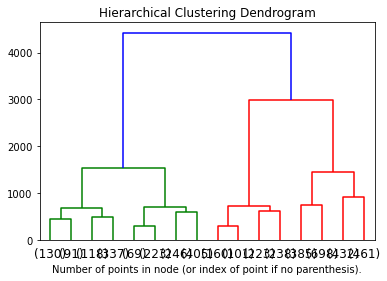

In [34]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_skills)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

***En el dendograma podemos ver en Verde y Azul los dos principales grupos encontrados, que pueden ser Atacantes y Defensas, como encontró el algoritmo de Mean Shift. Dentro de ellos podemos ver los subgrupos; esta representación nos dice que podemos encontrar 4 subgrupos dentro de los 2 grupos principales.***